**Cet analyse exploratoire de données a été réalisé par Asma CHKIRIDA du groupe 3 3IIR**

**Le dataset sur lequel nous allons travailler est un ensemble de données provenant d'Amazon. Il contient des informations sur des films, des émissions de télévision, des acteurs et d'autres données connexes. Ce dataset est particulièrement utile pour comprendre les préférences des utilisateurs et les tendances du marché dans l'industrie cinématographique et télévisuelle.**
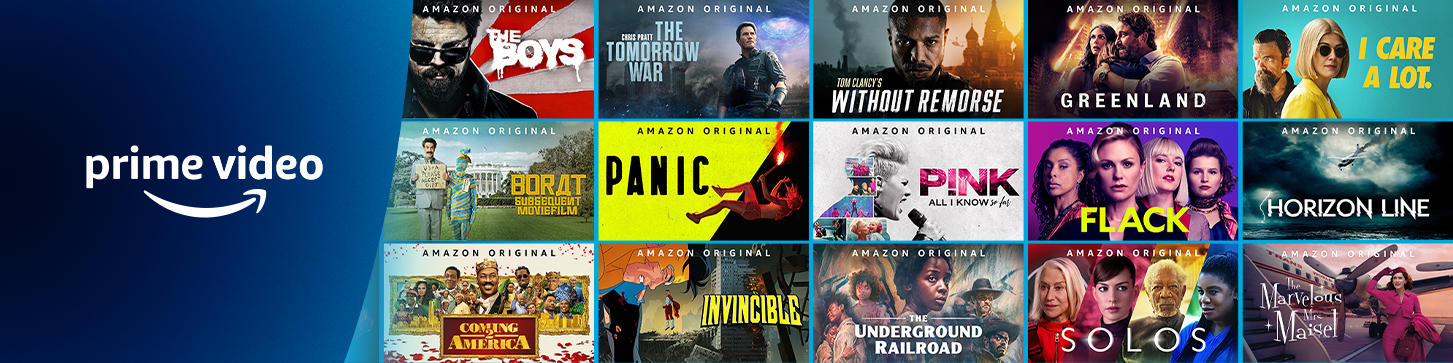

*Etape 1 :* **Importer des bibliothèques nécessaires pour l'analyse exploratoire de données (EDA)**




In [ ]:
import pandas as pd  
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt 
import plotly.graph_objects as go        
%matplotlib inline     
sns.set(color_codes=True)

*Etape 2 :* **Chargement des données**

**Après avoir importé les bibliothèques nécessaires, on va maintenant charger le dataset depuis un fichier CSV en utilisant la fonction "read_csv" de la bibliothèque pandas.**

In [ ]:
df = pd.read_csv("data.csv")

**Maintenant, on va visualiser les 5 premières lignes du dataset en utilisant la fonction "head()" de la bibliothèque pandas pour vérifier que le fichier a été correctement importé et pour obtenir un aperçu rapide des données et de leur contenu dans les différentes colonnes.**

In [ ]:
df.head(5) 

**On peut également visualiser les 5 dernières lignes, on utilisant la fonction "tail()"**

In [ ]:
df.tail(5)    

*Etape 3 :* **Vérification des types de données.**


**Il est important de vérifier les types de données lors d'une analyse exploratoire de données (EDA) car cela permet de s'assurer que les données sont correctement interprétées et traitées par les différentes fonctions et algorithmes utilisés dans l'analyse.**

In [ ]:
df.dtypes

*Etape 4 :* **Suppression des doublons**

In [ ]:
df.shape # permet de savoir le nombre de lignes et de colonnes


In [ ]:
Duplicated = df[df.duplicated()]
print("Nombre des lignes dupliquées: ", Duplicated.shape) # ce résultat (0, 12) indique qu'il n'y a pas de doublons, "Rien à Supprimer"

*Etape 5 :* **Suppression des valeurs manquantes ou nulles.**


  **Il est important de supprimer les valeurs manquantes ou nulles d'un dataset lors d'une analyse exploratoire de données (EDA) car ces valeurs peuvent affecter négativement les résultats de l'analyse et conduire à des erreurs ou des biais dans les conclusions tirées à partir des données.**



In [ ]:
print(df.isnull().sum()) # permet de savoir le nombre d'elements null dans chaque colonne

**Si on supprime les valeurs nulles de ce dataset, on risque de perdre une grande quantité de données qui pourraient être utiles pour notre analyse ou notre modèle. C'est pourquoi, plutôt que de les supprimer, il est souvent préférable de remplacer les valeurs manquantes par des valeurs appropriées, telles qu'une valeur par défaut telle que "unknown".**

In [ ]:
df["director"].fillna("unknown", inplace=True)
df["cast"].fillna("unknown", inplace=True)
df["country"].fillna("unknown", inplace=True)
df["date_added"].fillna("unknown", inplace=True)
df["rating"].fillna("unknown", inplace=True)


In [ ]:
print(df.isnull().sum()) # vérifier à nouveau (pas de valeurs nulles)

*Etape 6 :* **Visualisation et traitement des données**

# **Top 5 Réalisateurs/Directors**

**On veur visiualiser les 5 réalisateurs les plus productifs sur un histogramme. Pour ce faire, on va d'abord sélectionner les données correspondant aux réalisateurs non inconnus et compter leur fréquence, puis afficher un histogramme avec ces données en utilisant la fonction plt.bar().**

In [ ]:
top_director = df.query('director != "unknown"')['director'].value_counts().nlargest(5)
plt.bar(top_director.index, top_director.values, color='maroon')
plt.title("Number of Movies/Series by director")
plt.ylabel('Number of Movies/Series')
plt.xticks(rotation='vertical')
plt.xlabel('director');

In [ ]:
print(top_director)

# **Top 5 Catégories**

**on veut visualiser les top 5 catégories, c'est-à-dire les catégories avec le plus grand nombre de films/émissions de télévision, mais le problème c'est que la colonne 'listed_in' peut contenir plusieurs valeurs, par exemple un film peut être classé à la fois en comédie et en romance. On a donc décidé de séparer ces valeurs et de les stocker dans une liste. Ensuite, on prend les 5 catégories les plus fréquentes.**

In [ ]:
top_categories = df.listed_in.str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
top_categories = top_categories.value_counts().nlargest(5)
top_categories.plot(kind='bar', color='maroon', figsize=(8,4))
plt.title("Number of Movies/Series by category")
plt.ylabel('Number of Movies/Series')
plt.xlabel('Category')
plt.show()



In [ ]:
print(top_categories)

# **Les 10 meilleurs acteurs**

**dans cette partie, le but c'est de visualiser les 10 meilleurs acteurs/actrices avec le plus de films/séries. Cependant, la colonne "cast" contient souvent plusieurs noms. on doit donc les séparer et les stocker dans une liste, puis éliminer les valeurs "unknown" et "1". Ensuite, nous affichons un histogramme pour représenter graphiquement les résultats.**

In [ ]:
top_cast = df.cast.str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
top_actors = top_cast.value_counts().nlargest(12).drop('1').drop('unknown')
top_actors.plot(kind='bar', figsize=(8,4), color='maroon')
plt.title("Number of Movies/Series for each actor")
plt.ylabel('Number of Movies/Series')
plt.xlabel('Actor')
plt.show()


In [ ]:
print(top_actors)

# **Les cinq meilleures séries télévisées avec le plus grand nombre de saisons**

**Notre objectif est de déterminer les 5 meilleures séries télévisées en se basant sur le nombre de saisons. Pour y parvenir, on crée un nouveau dataset contenant uniquement les lignes dont la colonne "type" est "TV Show". Ensuite, on extrait le nombre de saisons de la colonne "duration", les trie par ordre décroissant, et affiche les 5 premiers.**

In [ ]:
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['Seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)
sorted_tv_shows = tv_shows.sort_values(by='Seasons', ascending=False)
sorted_tv_shows.head(5).plot(kind='bar', x='title', y='Seasons', figsize=(8,4), color='maroon')
plt.title("Number of seasons by TV show")
plt.ylabel('Number of seasons')
plt.xlabel('TV show title')
plt.show()

# **Les contenus similaires**

**Chaque film ou émission de télévision dispose d'une description donnant un aperçu de son contenu, ce qui peut nous aider à identifier d'autres films ou émissions avec des contenus similaires. Pour ce faire, on a choisi trois mots clés relevant du domaine du football. Ce code recherche ces mots dans chaque description et renvoie les films ou émissions de télévision correspondants.**

In [ ]:
# choisir des mots clés
football_keywords = ['football', 'goalkeeper', 'midfielder']
football_related = df[df['description'].str.contains('|'.join(football_keywords), case=False)]
print(football_related['title'])

# **Movies vs TV Shows**


**Dans cette partie, on souhaite savoir si Amazon a plus de films ou d'émissions, en se basant sur les colonnes "date_added" et "type". On extrait l'année de "date_added" et recherche tous les films et émissions dont la date d'ajout se situe au cours des cinq dernières années. Ensuite, on compte le nombre de films et d'émissions et construit un diagramme circulaire pour visualiser la répartition.**

In [ ]:
df_copy = df.drop(df[df["date_added"] == "unknown"].index).copy()
df_copy["date_added"] = pd.to_datetime(df_copy["date_added"], format="%B %d, %Y")

# Selectionner tous les films/ émissions ajoutés pendant les 5 dernieres années 
last_five_years = df_copy[df_copy["date_added"] >= pd.Timestamp.today() - pd.offsets.DateOffset(years=5)]

type_counts = last_five_years["type"].value_counts()
labels = ["TV Shows", "Movies"]
sizes = [type_counts["TV Show"], type_counts["Movie"]]
colors = ["maroon", "grey"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct="%1.1f%%", startangle=90)
ax1.axis("equal")
plt.show()

In [ ]:
print("TV Shows:", type_counts["TV Show"])
print("Movies:", type_counts["Movie"])

**On peut conclure qu'Amazon s'est davantage concentré sur les séries télévisées que sur les films au cours des dernières années.**

# **Bonus** ⭐

# **Nombre de Films et d'émissions par année**

**Dans cette partie, notre objectif est de déterminer le nombre d'émissions et de films par année. On commence par regrouper les données en fonction de leur type (film ou émission TV) et de l'année de réalisation, en ne considérant que les années entre 2000 et 2023. Ensuite, on compte le nombre d'occurrences pour chaque combinaison année-type. Enfin, on visualise ces données dans un graphique linéaire.**

In [ ]:
df_filtered = df[(df["release_year"] >= 2000) & (df["release_year"] <= 2023)]
# On va regrouper les données selon le "type" et "release_year" et on compte leur nombre
df_by_type_year = df_filtered.groupby(["type", "release_year"]).size().reset_index(name='count')
tv_shows = df_by_type_year[df_by_type_year["type"] == "TV Show"]
movies = df_by_type_year[df_by_type_year["type"] == "Movie"]
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=tv_shows["release_year"],
    y=tv_shows["count"],
    mode='lines+markers',
    name='TV Show',
    marker_color='grey'
))
fig.add_trace(go.Scatter(
    x=movies["release_year"],
    y=movies["count"],
    mode='lines+markers',
    name='Movie',
    marker_color='maroon'
))

fig.update_layout(title='Number of TV Shows and Movies Released Each Year',
                  xaxis_title='Year',
                  yaxis_title='Number of Shows/Movies Released')

fig.show()

# **Les pays les mieux représentés dans le contenu d'Amazon**

**Dans cette partie, on cherche à identifier les pays ayant le plus de contenu sur Amazon. Pour ce faire, on commence par éliminer toutes les lignes contenant des valeurs inconnues. Ensuite, on sépare les valeurs contenues dans chaque ligne de la colonne "country" afin d'obtenir un pays distinct par ligne. On compte ensuite le nombre d'occurrences de chaque pays. Enfin, on sélectionne les cinq pays les plus fréquents, en prenant en compte le nombre de séries TV et de films associés à chacun d'entre eux.**

In [ ]:
df_copy = df.drop(df[df["country"] == "unknown"].index).copy()
country_counts = df_copy['country'].str.split(',', expand=True).stack().value_counts()

top_5countries = country_counts.head(5)

fig, ax = plt.subplots(figsize=(8, 4))
top_5countries.plot(kind='bar', color='maroon', ax=ax)
plt.title('Top Countries for Amazon Movies/TV Shows')
plt.xlabel('Country')
plt.ylabel('Number of Movies/Tv shows')


plt.show()






# **La répartition des films et émissions par classification**

**On souhaite explorer la répartition des films et émissions en fonction de leur classification. Pour ce faire, on commence par éliminer les valeurs inconnues dans la colonne "rating". Ensuite, on compte le nombre d'occurrences de chaque valeur de classification et affiche les dix principales catégories dans un diagramme en secteurs (pie chart).**

In [ ]:
df_copy = df.drop(df[df["rating"] == "unknown"].index).copy()

rating_counts = df_copy['rating'].value_counts()
top_10_ratings = rating_counts.head(10)

colors = ['#400000', '#550000', '#700000', '#850000', '#9F0000', '#B70000', '#D00000', '#E50000', '#F00000', '#FF0000']

fig, ax = plt.subplots(figsize=(10, 10))
top_10_ratings.plot(kind='pie', ax=ax, autopct='%1.1f%%', colors=colors)

plt.title('Distribution of Movies/TV Shows by Rating')
plt.show()
